In [115]:
#References: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split #plit arrays or matrices into random train and test subsets
from sklearn.linear_model import LinearRegression #ordinary least squares Linear Regression
from sklearn import metrics #accuracy classification score
#import os

#os.getcwd() #current working directory
data = pd.read_csv('/home/larag/Desktop/Weather.csv')
data.shape #number of rows, number os columns

(119040, 31)

In [116]:
data.describe() #generate descriptive statistics

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [117]:
data.head(10) #return the first n rows

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
print(data.columns.values) #features

['STA' 'Date' 'Precip' 'WindGustSpd' 'MaxTemp' 'MinTemp' 'MeanTemp'
 'Snowfall' 'PoorWeather' 'YR' 'MO' 'DA' 'PRCP' 'DR' 'SPD' 'MAX' 'MIN'
 'MEA' 'SNF' 'SND' 'FT' 'FB' 'FTI' 'ITH' 'PGT' 'TSHDSBRSGF' 'SD3' 'RHX'
 'RHN' 'RVG' 'WTE']


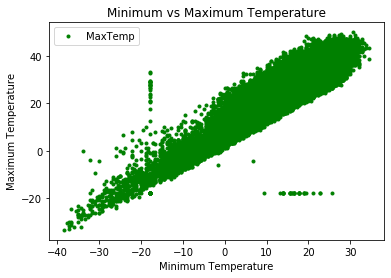

In [119]:
data.plot(x='MinTemp', y='MaxTemp', style='.', color='green') #'.': point marker
plt.title('Minimum vs Maximum Temperature')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.show()

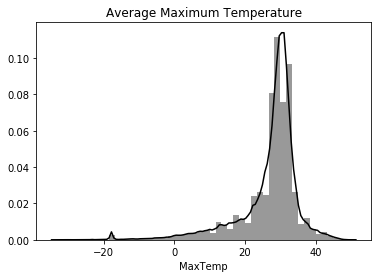

In [120]:
plt.figure() #create a new figure.
plt.tight_layout() #automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.title('Average Maximum Temperature')
sns.distplot(data['MaxTemp'], color="0") #flexibly plot a univariate distribution of observations; By default, this will draw a histogram and fit a kernel density estimate (KDE)
plt.show() #display the figure

In [121]:
#We want to predict the MaxTemp depending upon the MinTemp recorded
#A numpy matrix can be reshaped into a vector using reshape function with parameter -1
X = data['MinTemp'].values.reshape(-1,1)
y = data['MaxTemp'].values.reshape(-1,1)

In [122]:
#we split 70% of the data to the training set and 30% to test
#andom_state is the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [123]:
model = LinearRegression() 
model.fit(X_train, y_train) #training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
float(model.coef_) #slope

0.9193872935019218

In [125]:
float(model.intercept_) #intercept

10.670129740799577

In [126]:
y_pred = model.predict(X_test)

In [127]:
data = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
data

,Actual,Predicted
0,28.888889,33.654812
1,31.111111,30.079417
2,27.222222,26.504022
3,28.888889,31.100958
4,23.333333,15.777837
...,...,...
35707,29.444444,34.165583
35708,19.444444,17.820920
35709,27.222222,25.993251
35710,26.111111,25.993251


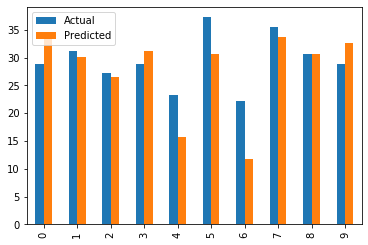

In [129]:
plot = data.head(10)
plot.plot(kind='bar')
plt.show()

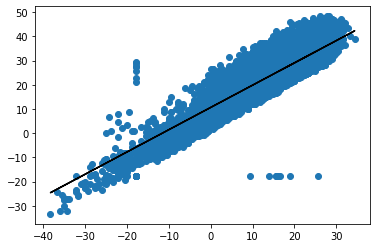

In [131]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='black')
plt.show()

In [134]:
print(metrics.mean_squared_error(y_test, y_pred))

17.49813185868173


In [139]:
print(metrics.mean_absolute_error(y_test, y_pred))

3.1974386977579554
